# Van der Pol Equation

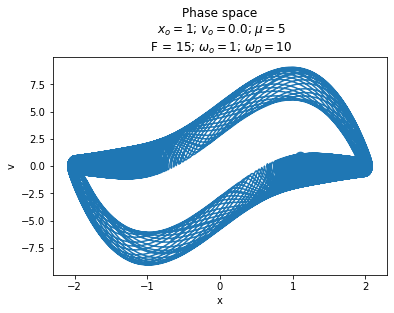

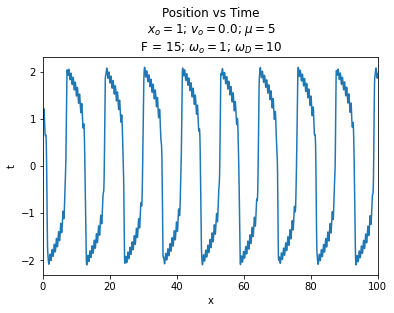

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
@njit
def fX(v):
    return v
@njit
def fV(x,v,u,w_d,w_o,F,t):
    return (u*(1 - x**2)*v - w_o**2*x + F*np.cos(w_d*t))
    #return (-(w_o**2)*x)
    
@njit
def RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,F):
    X = x_o
    V = v_o
    t = t_o + dt
    X_list = [x_o]
    V_list = [v_o]
    T_list = [t_o]
    while(t < tf):
        k1X = fX(V)
        k1V = fV(X,V,u,w_d,w_o,F,t)
        Xaux = X + k1X*dt/2
        Vaux = V + k1V*dt/2 
        k2X = fX(Vaux)
        k2V = fV(Xaux,Vaux,u,w_d,w_o,F, t+dt/2)
        X = X + k2X*dt
        V = V + k2V*dt
        #print(V)
        #print(X)
        X_list.append(X)
        V_list.append(V)
        T_list.append(t)
        t += dt
    return X_list, V_list, T_list

# --- Initial values -----
x_o = 1 # position
v_o = 0.0 # velocity 
u = 5 # mu constant
w_d = 10 # frequency of the external force
w_o = 1 # frequency
F = 15 # external force amplitude
t_o = 0 # initial time
tf = 300 # final time
dt = 0.001

X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,F)

plt.figure()
#print(V_list)
plt.title("Phase space\n $x_o = {0}$; $v_o = {1}$; $\mu = {2}$\n F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("v")
plt.plot(X_list, V_list)
plt.show()
plt.close()

plt.figure()
#print(V_list)
plt.title("Position vs Time\n $x_o = {0}$; $v_o = {1}$; $\mu = {2}$\n F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("t")
plt.xlim(0,100)
plt.plot(T_list, X_list)
plt.show()
plt.close()


In [206]:
# PHASE SPACE FOR MU < -2 
POINT = [[0.1,0.04],[-0.1,0.04],[0.1,-0.6],[-0.1,-0.6],[0.1,0.6],[-0.1,0.6]]
#POINT = [[1,0.04]]
u = -3 # mu constant
F= 0
tf = 30
plt.figure()
plt.title("Phase space\n $\mu = {2}$ F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("v")
for i in POINT:
    #print(i[1])
    X_list, V_list, T_list = RK2(i[0],i[1],t_o,tf,dt,u,w_d,w_o,F)
    #print(V_list)
    plt.plot(X_list, V_list)
    
#plt.show()
plt.savefig("nó.pdf")
plt.close()

In [207]:
# PHASE SPACE FOR MU > 2 
POINT = [[0.1,0.04],[-0.1,0.04],[0.1,-0.6],[-0.1,-0.6],[0.1,0.6],[-0.1,0.6]]
#POINT = [[3,0.04]]
u = 3 # mu constant
F= 0
tf = 30
plt.figure()
plt.title("Phase space\n  $\mu = {2}$ F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("v")
for i in POINT:
    #print(i[1])
    X_list, V_list, T_list = RK2(i[0],i[1],t_o,tf,dt,u,w_d,w_o,F)
    #print(V_list)
    plt.plot(X_list, V_list)
    
#plt.show()
plt.savefig("limit-mu3.pdf")
plt.close()

In [208]:
# PHASE SPACE FOR MU 0 a -2 
POINT = [[0.1,0.04],[-0.1,0.04],[0.1,-0.6],[-0.1,-0.6],[0.1,0.6],[-0.1,0.6]]
#POINT = [[3,0.04]]
u = -1 # mu constant
F= 0
tf = 30
plt.figure()
plt.title("Phase space\n $\mu = {2}$ F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("v")
for i in POINT:
    #print(i[1])
    X_list, V_list, T_list = RK2(i[0],i[1],t_o,tf,dt,u,w_d,w_o,F)
    #print(V_list)
    plt.plot(X_list, V_list)
    
#plt.show()
plt.savefig("focuus.pdf")
plt.close()

In [209]:
# PHASE SPACE FOR MU 0 a 2
POINT = [[0.1,0.04],[-0.1,0.04],[0.1,-0.6],[-0.1,-0.6],[0.1,0.6],[-0.1,0.6]]
#POINT = [[3,0.04]]
u = 1 # mu constant
F= 0
tf = 30
plt.figure()
plt.title("Phase space\n $\mu = {2}$ F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("v")
for i in POINT:
    #print(i[1])
    X_list, V_list, T_list = RK2(i[0],i[1],t_o,tf,dt,u,w_d,w_o,F)
    #print(V_list)
    plt.plot(X_list, V_list)
    
#plt.show()
plt.savefig("limit-mu1.pdf")
plt.close()

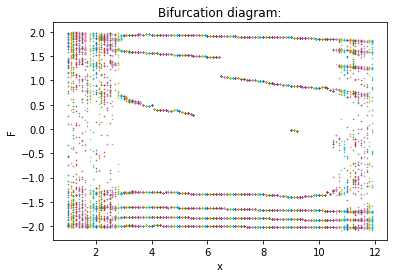

In [128]:

F = np.arange(1,12,0.1)
# --- Initial values -----
x_o = 0.5 # position
v_o = 0.0 # velocity 
u = 5.0 # mu constant
w_d = 5 # frequency of the external force
w_o = 1 # frequency

t_o = 0 # initial time
tf = 500 # final time
dt = 0.1

plt.figure()
plt.title("Bifurcation diagram\n $x_o = {0}$; $v_o = {1}$; $\mu = {2}$\n $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("F")
for i in F:
    #print(i)
    F_list = []
    xList = []
    for j in range(20):
        X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,i)
        x_o,v_o = X_list[-1], V_list[-1]
    for j in range(100):
        X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,i)
        x_o,v_o = X_list[-1], V_list[-1]
        xList.append(X_list[-1])
        F_list.append(i)
    plt.scatter(F_list,xList,marker='.',s=1)
#plt.xlim(24,26)
plt.show()

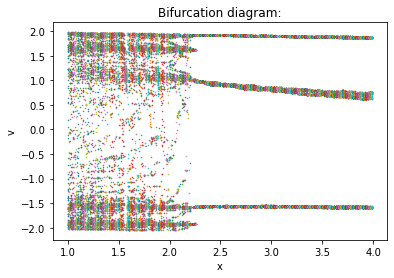

In [146]:
F = np.arange(1,4,0.01)
# --- Initial values -----
x_o = 0.5 # position
v_o = 0.0 # velocity 
u = 5.0 # mu constant
w_d = 3 # frequency of the external force
w_o = 1 # frequency

t_o = 0 # initial time
tf = 500 # final time
dt = 0.1

plt.figure()
plt.title("Bifurcation diagram\n $x_o = {0}$; $v_o = {1}$; $\mu = {2}$\n $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("v")
for i in F:
    #print(i)
    F_list = []
    xList = []
    for j in range(20):
        X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,i)
        x_o,v_o = X_list[-1], V_list[-1]
    for j in range(100):
        X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,i)
        x_o,v_o = X_list[-1], V_list[-1]
        xList.append(X_list[-1])
        F_list.append(i)
    plt.scatter(F_list,xList,marker='.',s=1)
#plt.xlim(24,26)
plt.show()

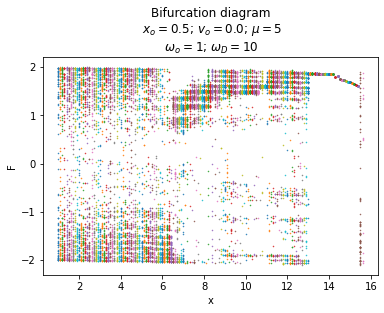

In [191]:
F = np.arange(1,17,0.1)
# --- Initial values -----
x_o = 0.5 # position
v_o = 0.0 # velocity 
u = 5 # mu constant
w_d = 10 # frequency of the external force
w_o = 1 # frequency
t_o = 0 # initial time
tf = 500 # final time
dt = 0.1

plt.figure()
plt.title("Bifurcation diagram\n $x_o = {0}$; $v_o = {1}$; $\mu = {2}$\n $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("F")
for i in F:
    #print(i)
    F_list = []
    xList = []
    for j in range(20):
        X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,i)
        x_o,v_o = X_list[-1], V_list[-1]
    for j in range(100):
        X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,i)
        x_o,v_o = X_list[-1], V_list[-1]
        xList.append(X_list[-1])
        F_list.append(i)
    plt.scatter(F_list,xList,marker='.',s=1)
plt.show()

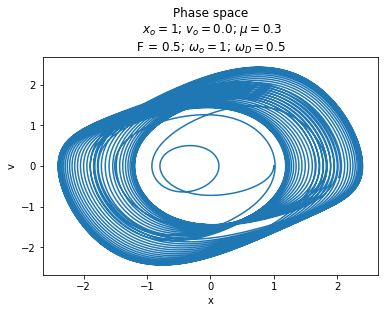

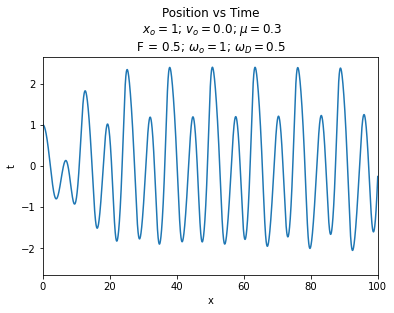

In [190]:
# --- Initial values -----
x_o = 1 # position
v_o = 0.0 # velocity 
u = 0.3 # mu constant
w_d = 0.5 # frequency of the external force
w_o = 1 # frequency
F = 0.5 # external force amplitude
t_o = 0 # initial time
tf = 300 # final time
dt = 0.001

X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,u,w_d,w_o,F)

plt.figure()
#print(V_list)
plt.title("Phase space\n $x_o = {0}$; $v_o = {1}$; $\mu = {2}$\n F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("v")
plt.plot(X_list, V_list)
plt.show()
plt.close()

plt.figure()
#print(V_list)
plt.title("Position vs Time\n $x_o = {0}$; $v_o = {1}$; $\mu = {2}$\n F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("t")
plt.xlim(0,100)
plt.plot(T_list, X_list)
plt.show()
plt.close()


In [218]:
# --- Initial values -----
x_o = 1 # position
v_o = 0.0 # velocity 
w_d = 0 # frequency of the external force
w_o = 1 # frequency
F = 0.0 # external force amplitude
t_o = 0 # initial time
tf = 50 # final time
dt = 0.001
u = [0.1,1.0,2.0]


plt.figure()
#print(V_list)
plt.title("Phase space\n $x_o = {0}$; $v_o = {1}$; F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("x")
plt.ylabel("v")
for i in u:
    X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,i,w_d,w_o,F)
    plt.plot(X_list, V_list, label="$\mu = {0}$".format(i))

plt.legend()
#plt.show()
plt.savefig("orbits_mu.pdf")
plt.close()

plt.figure()
#print(V_list)
plt.title("Phase space\n $x_o = {0}$; $v_o = {1}$; F = {3}; $\omega_o = {4}$; $\omega_D = {5}$ ".format(x_o,v_o,u,F,w_o,w_d) )
plt.xlabel("Time")
plt.ylabel("Position")
for i in u:
    X_list, V_list, T_list = RK2(x_o,v_o,t_o,tf,dt,i,w_d,w_o,F)
    plt.plot(T_list, X_list, label="$\mu = {0}$".format(i))
plt.legend()
#plt.show()
plt.xlim(0,50)
plt.savefig("posT_mu.pdf")
plt.close()